In [1]:
import csv
import copy 
import matplotlib
import pandas

# Allows you to render matplotlib graphs in the same notebook
%matplotlib inline 

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16) 
    


def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data

def get_mapping(path):
    csv_data = process_csv(path) 
    get_map_dict = {} 
    for i in range(len(csv_data)): 
        name = str(csv_data[i][1]) 
        Id = str(csv_data[i][0]) 
        if name not in get_map_dict: 
            get_map_dict[Id] = name 
    return get_map_dict

def get_movies(movies_path, mapping_path):
    new_list1 = ["title", "directors", "actors"]
    new_list2 = ["directors", "actors", "genres"]
    unchanged = get_raw_movies(movies_path)
    mapping = get_mapping(mapping_path)
    for idx in range(len(unchanged)):
        movie = unchanged[idx]
        for key in movie:
            if key in new_list1 and key in new_list2:
                ultimate_list = []
                for id in movie[key]:
                    ultimate_list.append(mapping[id])
                unchanged[idx][key] = ultimate_list
            elif key in new_list1:
                new = unchanged[idx][key]
                unchanged[idx][key] = mapping[new]
    return unchanged 

def search_bar(movies, keyword):
    '''given a list of movie dictionaries and a keyword, 
    returns a list of movies that contains the keyword'''
    idx = 0
    while idx < len(movies):
        movie = movies[idx]
        if (keyword not in movie['title']) and (keyword not in movie["genres"]) and  (keyword not in movie["directors"]) and (keyword not in movie["actors"]):
            movies.pop(idx)
        else:
            idx += 1
    return movies 

def get_raw_movies(path):
    import csv
    raw_mov = process_csv(path) 
    mov_data = raw_mov[1:]
    raw_mov_list = [] 
    for i in mov_data: 
        raw_dict = {}
        raw_dict["title"] = i[0] 
        raw_dict["year"] = int(i[1])
        raw_dict["genres"] = i[2].split(', ') 
        raw_dict["duration"] = int(i[3]) 
        raw_dict["directors"] = i[4].split(', ') 
        raw_dict["actors"] = i[5].split(', ') 
        raw_dict["rating"] = float(i[6])  
        raw_mov_list.append(raw_dict) 
    return raw_mov_list 

movies = get_movies("movies.csv", "mapping.csv")

In [2]:
#q1
movies_copy = copy.deepcopy(movies)
pete = search_bar(movies_copy, "Peter Jackson") 
lor = []
for i in pete: 
    if "Lord of the Rings" in i["title"]: 
           lor.append(i)
rate_list = []
for mov in lor: 
    rating = mov['rating'] 
    rate_list.append(rating) 
sum(rate_list) / len(rate_list)
 
    

8.8

In [3]:
def median(items):
    items1 = sorted(items)
    if len(items1) % 2 == 1:
        return items1[len(items) // 2] 
    else:
        first = items1[(len(items1) // 2) - 1]
        second = items1[len(items1) // 2]
        median = (first + second) / 2 
        return median  


In [4]:
#q2
mission_copy = copy.deepcopy(movies) 
mission = search_bar(mission_copy, 'Mission: Impossible') 
mis_rating = []
for i in mission: 
    mis_rating.append(i['rating'])
median(mis_rating)

7.25

In [5]:
#q3
min_rating = 10 
for i in movies: 
    rate = i['rating']
    if rate < min_rating: 
        min_rating = rate 
min_rating 

terrible_movies = [] 
for i in movies: 
    if i['rating'] == 1.1: 
        terrible_movies.append(i)  
terrible_movies

[{'title': 'Proud American',
  'year': 2008,
  'genres': ['Drama'],
  'duration': 115,
  'directors': ['Fred Ashman'],
  'actors': ['Michael G. Davis',
   'Cecelia Antoinette',
   'Marie Antoinette',
   'Michelle Ashman'],
  'rating': 1.1},
 {'title': 'Troy: The Resurrection of Aeneas',
  'year': 2018,
  'genres': ['Animation', 'Action', 'Adventure'],
  'duration': 60,
  'directors': ['Aeneas Middleton'],
  'actors': ['Aeneas Middleton', 'Hardley Davidson'],
  'rating': 1.1},
 {'title': 'Browncoats: Independence War',
  'year': 2015,
  'genres': ['Action', 'Sci-Fi', 'War'],
  'duration': 98,
  'directors': ['Francis Hamada'],
  'actors': ['Beth Bemis',
   'Richard Martinsen',
   'Will James Johnson',
   'Nathan Cosmo Rahn'],
  'rating': 1.1},
 {'title': 'The Time Machine (I Found at a Yardsale)',
  'year': 2011,
  'genres': ['Sci-Fi'],
  'duration': 84,
  'directors': ['Steven A. Sandt'],
  'actors': ['George Abdelmalak', 'Steven Ronald Brattman', 'Elise Caloca'],
  'rating': 1.1},
 {'

In [6]:
#q4
toy_movie_copy = copy.deepcopy(movies)
toy_movies = search_bar(toy_movie_copy, "Toy Story")  
max_rating = 0 
for i in toy_movies: 
    rate = i['rating']
    if rate > max_rating: 
        max_rating = rate 
best_toy = []
for i in toy_movies: 
    if i['rating'] == max_rating: 
        best_toy.append(i)
best_toy

[{'title': 'Toy Story 3',
  'year': 2010,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 103,
  'directors': ['Lee Unkrich'],
  'actors': ['Tom Hanks', 'Tim Allen'],
  'rating': 8.3},
 {'title': 'Toy Story',
  'year': 1995,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 81,
  'directors': ['John Lasseter'],
  'actors': ['Tom Hanks', 'Tim Allen', 'Don Rickles'],
  'rating': 8.3}]

In [7]:
def bucketize(movie_list, category):
    buckets = {}
    for movie in range(len(movie_list)):
        category_value = movie_list[movie][category]
        if type(category_value) == list:
            for i in range(len(category_value)):
                if category_value[i] not in buckets:
                    buckets[category_value[i]] = [movie_list[movie]]
                else:    
                    buckets[category_value[i]].append(movie_list[movie])
        else:
            if category_value not in buckets:
                buckets[category_value] = [movie_list[movie]]
            else:
                buckets[category_value].append(movie_list[movie])
            
    return buckets

In [8]:
#Q5: Find the list of movies 'Chadwick Boseman' acted in.
actor_bucket_list = bucketize(movies, "actors")
actor_bucket_list["Chadwick Boseman"]

[{'title': 'Message from the King',
  'year': 2016,
  'genres': ['Action', 'Crime', 'Drama'],
  'duration': 102,
  'directors': ['Fabrice du Welz'],
  'actors': ['Chadwick Boseman', 'Luke Evans'],
  'rating': 6.4},
 {'title': 'Black Panther',
  'year': 2018,
  'genres': ['Action', 'Adventure', 'Sci-Fi'],
  'duration': 134,
  'directors': ['Ryan Coogler'],
  'actors': ['Chadwick Boseman', 'Michael B. Jordan', "Lupita Nyong'o"],
  'rating': 7.3},
 {'title': 'Get on Up',
  'year': 2014,
  'genres': ['Biography', 'Drama', 'Music'],
  'duration': 139,
  'directors': ['Tate Taylor'],
  'actors': ['Chadwick Boseman', 'Nelsan Ellis', 'Dan Aykroyd'],
  'rating': 6.9},
 {'title': '21 Bridges',
  'year': 2019,
  'genres': ['Action', 'Crime', 'Drama'],
  'duration': 99,
  'directors': ['Brian Kirk'],
  'actors': ['Chadwick Boseman', 'Sienna Miller', 'J.K. Simmons'],
  'rating': 6.6},
 {'title': '42',
  'year': 2013,
  'genres': ['Biography', 'Drama', 'Sport'],
  'duration': 128,
  'directors': ['B

In [9]:
#Q6: Find the list of movies 'Emma Stone' acted in.
actor_bucket_list["Emma Stone"]

[{'title': 'The Croods',
  'year': 2013,
  'genres': ['Animation', 'Action', 'Adventure'],
  'duration': 98,
  'directors': ['Kirk DeMicco', 'Chris Sanders'],
  'actors': ['Nicolas Cage', 'Emma Stone'],
  'rating': 7.2},
 {'title': 'Marmaduke',
  'year': 2010,
  'genres': ['Comedy', 'Family'],
  'duration': 99,
  'directors': ['Tom Dey'],
  'actors': ['Owen Wilson',
   'Emma Stone',
   'George Lopez',
   'Christopher Mintz-Plasse'],
  'rating': 4.3},
 {'title': 'The Help',
  'year': 2011,
  'genres': ['Drama'],
  'duration': 146,
  'directors': ['Tate Taylor'],
  'actors': ['Emma Stone', 'Viola Davis', 'Bryce Dallas Howard'],
  'rating': 8.0},
 {'title': 'Easy A',
  'year': 2010,
  'genres': ['Comedy', 'Drama', 'Romance'],
  'duration': 92,
  'directors': ['Will Gluck'],
  'actors': ['Emma Stone', 'Penn Badgley', 'Amanda Bynes', 'Dan Byrd'],
  'rating': 7.0},
 {'title': 'Irrational Man',
  'year': 2015,
  'genres': ['Comedy', 'Drama', 'Romance'],
  'duration': 95,
  'directors': ['Wood

In [10]:
#Q7: Find the number of movies in each genre.
genre_buckets = bucketize(movies, "genres")
genre_dict = {}
for genre in list(genre_buckets.keys()):
    if genre not in genre_dict:
        genre_dict[genre] = len(genre_buckets[genre])
genre_dict

{'Action': 5611,
 'Horror': 5175,
 'Sci-Fi': 2148,
 'Crime': 5078,
 'Thriller': 5340,
 'Comedy': 11130,
 'Drama': 16410,
 'Romance': 5753,
 'History': 627,
 'Adventure': 3849,
 'Western': 1177,
 'Family': 1585,
 'Fantasy': 1537,
 'War': 779,
 'Sport': 565,
 'Biography': 1009,
 'Mystery': 2479,
 'Film-Noir': 647,
 'Music': 908,
 'Animation': 676,
 'Musical': 941,
 'Reality-TV': 1,
 'Documentary': 1,
 'News': 1}

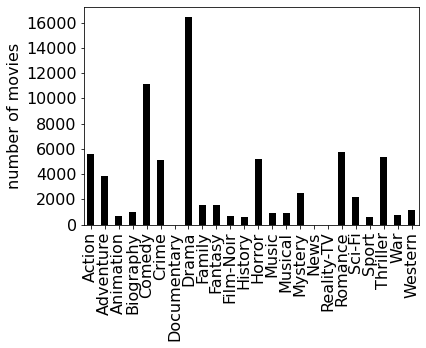

In [11]:
#Q8: Plot the number of movies in each genre as a bar graph.
plot_dict(genre_dict, "number of movies")

In [12]:
#Q9: Find the number of movies released in each decade.
def year_to_decade(year):
    if year % 10 == 0:
        return str(year - 9) + " to " + str(year) # complete this line
    else:
        return str(year - year % 10 + 1) + " to " + str(year - year % 10 + 10) # complete this line

year_buckets = bucketize(movies, "year")  
year_dict = {}
for year in list(year_buckets.keys()):
    ytd = year_to_decade(year)
    if ytd not in year_dict:
        year_dict[ytd] = len(year_buckets[year])
    else:
        year_dict[ytd] += len(year_buckets[year])
year_dict


{'1981 to 1990': 2840,
 '2011 to 2020': 8884,
 '2001 to 2010': 6271,
 '1941 to 1950': 2256,
 '1971 to 1980': 1889,
 '1951 to 1960': 2201,
 '1931 to 1940': 2256,
 '1961 to 1970': 1609,
 '1991 to 2000': 4280,
 '1911 to 1920': 120,
 '1921 to 1930': 496}

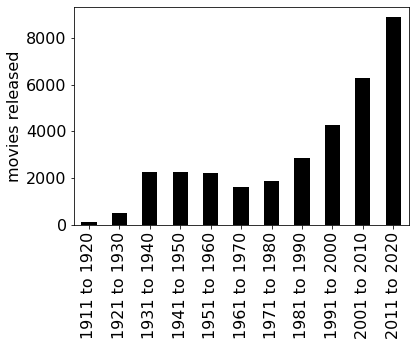

In [13]:
#Q10: Plot the number of movies released in each decade as a bar graph.
plot_dict(year_dict, "movies released")

In [24]:
#Q11: Find the highest rated movies for each genre.
def max_rating(genre):
    max_rating = 0
    for movie in genre_buckets[genre]:
        rate = movie["rating"]
        if rate > max_rating: 
            max_rating = rate 
    return max_rating

max_genre_dict = {}
for genre in genre_buckets:
    if genre not in max_genre_dict:
        max_genre_dict[genre] = []
        for movie in range(len(genre_buckets[genre])):
            if genre_buckets[genre][movie]["rating"] == max_rating(genre):
                max_genre_dict[genre].append(genre_buckets[genre][movie])
max_genre_dict

{'Action': [{'title': 'The Dark Knight',
   'year': 2008,
   'genres': ['Action', 'Crime', 'Drama'],
   'duration': 152,
   'directors': ['Christopher Nolan'],
   'actors': ['Christian Bale',
    'Heath Ledger',
    'Aaron Eckhart',
    'Michael Caine'],
   'rating': 9.0}],
 'Horror': [{'title': 'Psycho',
   'year': 1960,
   'genres': ['Horror', 'Mystery', 'Thriller'],
   'duration': 109,
   'directors': ['Alfred Hitchcock'],
   'actors': ['Anthony Perkins', 'Vera Miles', 'John Gavin'],
   'rating': 8.5}],
 'Sci-Fi': [{'title': 'Inception',
   'year': 2010,
   'genres': ['Action', 'Adventure', 'Sci-Fi'],
   'duration': 148,
   'directors': ['Christopher Nolan'],
   'actors': ['Leonardo DiCaprio',
    'Joseph Gordon-Levitt',
    'Ellen Page',
    'Tom Hardy'],
   'rating': 8.8}],
 'Crime': [{'title': 'The Godfather',
   'year': 1972,
   'genres': ['Crime', 'Drama'],
   'duration': 175,
   'directors': ['Francis Ford Coppola'],
   'actors': ['Marlon Brando', 'Al Pacino'],
   'rating': 9.

In [25]:
#q12
def median_rating(genre):
    median_list = []
    for movie in genre_buckets[genre]:
        rate = movie["rating"]
        median_list.append(rate)
    return median(median_list)

med_rate_dict = {} 
for genre in genre_buckets: 
      med_rate_dict[genre] = median_rating(genre)
med_rate_dict

{'Action': 5.5,
 'Horror': 4.6,
 'Sci-Fi': 4.9,
 'Crime': 6.0,
 'Thriller': 5.1,
 'Comedy': 5.9,
 'Drama': 6.1,
 'Romance': 6.2,
 'History': 6.5,
 'Adventure': 6.0,
 'Western': 6.2,
 'Family': 5.9,
 'Fantasy': 5.7,
 'War': 6.4,
 'Sport': 6.1,
 'Biography': 6.7,
 'Mystery': 5.8,
 'Film-Noir': 6.6,
 'Music': 6.2,
 'Animation': 6.4,
 'Musical': 6.2,
 'Reality-TV': 2.1,
 'Documentary': 7.5,
 'News': 6.4}

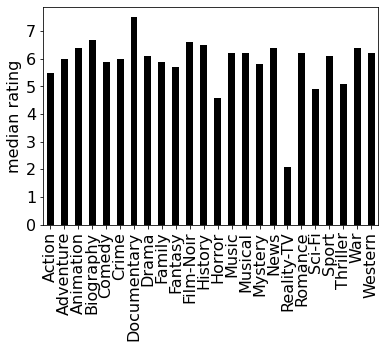

In [21]:
#q13 
plot_dict(med_rate_dict, "median rating")

In [26]:
#q14 
rev_mrd = {k: v for k, v in sorted(med_rate_dict.items(), key=lambda item: item[1], reverse = True)} 
rev_mrd

{'Documentary': 7.5,
 'Biography': 6.7,
 'Film-Noir': 6.6,
 'History': 6.5,
 'War': 6.4,
 'Animation': 6.4,
 'News': 6.4,
 'Romance': 6.2,
 'Western': 6.2,
 'Music': 6.2,
 'Musical': 6.2,
 'Drama': 6.1,
 'Sport': 6.1,
 'Crime': 6.0,
 'Adventure': 6.0,
 'Comedy': 5.9,
 'Family': 5.9,
 'Mystery': 5.8,
 'Fantasy': 5.7,
 'Action': 5.5,
 'Thriller': 5.1,
 'Sci-Fi': 4.9,
 'Horror': 4.6,
 'Reality-TV': 2.1}

In [27]:
#Q15: Sort all 'Star Wars' movies in increasing order of their year of release.
mov_copy4 = copy.deepcopy(movies)
starwars_dict = search_bar(mov_copy4, "Star Wars")
starwars_sort = sorted(starwars_dict, key = lambda p: p['year'])
starwars_sort

[{'title': 'Star Wars',
  'year': 1977,
  'genres': ['Action', 'Adventure', 'Fantasy'],
  'duration': 121,
  'directors': ['George Lucas'],
  'actors': ['Mark Hamill', 'Harrison Ford', 'Carrie Fisher'],
  'rating': 8.6},
 {'title': 'Star Wars: Episode V - The Empire Strikes Back',
  'year': 1980,
  'genres': ['Action', 'Adventure', 'Fantasy'],
  'duration': 124,
  'directors': ['Irvin Kershner'],
  'actors': ['Mark Hamill', 'Harrison Ford'],
  'rating': 8.7},
 {'title': 'Star Wars: Episode VI - Return of the Jedi',
  'year': 1983,
  'genres': ['Action', 'Adventure', 'Fantasy'],
  'duration': 131,
  'directors': ['Richard Marquand'],
  'actors': ['Mark Hamill',
   'Harrison Ford',
   'Carrie Fisher',
   'Billy Dee Williams',
   'Anthony Daniels'],
  'rating': 8.3},
 {'title': 'Star Wars: Episode I - The Phantom Menace',
  'year': 1999,
  'genres': ['Action', 'Adventure', 'Fantasy'],
  'duration': 136,
  'directors': ['George Lucas'],
  'actors': ['Liam Neeson', 'Ewan McGregor', 'Natalie

In [28]:
#Q16: Find a list of all movies that are both acted and directed by 'Clint Eastwood'.
director_bucket_list = bucketize(movies, "directors")
clint_act_dir = []
for movie in movies:
    if movie in actor_bucket_list["Clint Eastwood"]:
        if movie in director_bucket_list["Clint Eastwood"]:
            clint_act_dir.append(movie)
clint_act_dir

[{'title': 'Space Cowboys',
  'year': 2000,
  'genres': ['Action', 'Adventure', 'Thriller'],
  'duration': 130,
  'directors': ['Clint Eastwood'],
  'actors': ['Clint Eastwood',
   'Tommy Lee Jones',
   'Donald Sutherland',
   'James Garner',
   'James Cromwell'],
  'rating': 6.4},
 {'title': 'Heartbreak Ridge',
  'year': 1986,
  'genres': ['Drama', 'War'],
  'duration': 130,
  'directors': ['Clint Eastwood'],
  'actors': ['Clint Eastwood', 'Marsha Mason', 'Everett McGill', 'Moses Gunn'],
  'rating': 6.9},
 {'title': 'Firefox',
  'year': 1982,
  'genres': ['Action', 'Adventure', 'Thriller'],
  'duration': 136,
  'directors': ['Clint Eastwood'],
  'actors': ['Clint Eastwood', 'Freddie Jones', 'David Huffman'],
  'rating': 6.0},
 {'title': 'The Rookie',
  'year': 1990,
  'genres': ['Action', 'Crime', 'Drama'],
  'duration': 120,
  'directors': ['Clint Eastwood'],
  'actors': ['Clint Eastwood', 'Charlie Sheen'],
  'rating': 5.9},
 {'title': 'Pale Rider',
  'year': 1985,
  'genres': ['Dram

In [29]:
#Q17: Sort the titles of the movies that are both acted and directed by 'Clint Eastwood'.
clint_sort = sorted(clint_act_dir, key = lambda p: p['duration'])
clint_titles = {}
for movie in clint_sort:
    clint_titles[movie["title"]] = movie["duration"]
list(clint_titles.keys())

#clint_final_dict = {}
#for dur in clint_titles.values():
#    if dur not in clint_final_dict:
#        clint_final_dict[dur] = []

#for duration in clint_final_dict.keys():
#    for movie in clint_titles:
#        if clint_titles.get(movie) == duration:
#            clint_final_dict[duration].append(movie)
#list(clint_final_dict.values())

['Play Misty for Me',
 'High Plains Drifter',
 'The Gauntlet',
 'Blood Work',
 'White Hunter Black Heart',
 'Pale Rider',
 'Gran Torino',
 'The Mule',
 'Bronco Billy',
 'Sudden Impact',
 'The Rookie',
 'Absolute Power',
 'Honkytonk Man',
 'True Crime',
 'The Eiger Sanction',
 'Space Cowboys',
 'Heartbreak Ridge',
 'Unforgiven',
 'Million Dollar Baby',
 'The Bridges of Madison County',
 'The Outlaw Josey Wales',
 'Firefox',
 'A Perfect World']

In [30]:
#Q18: Sort the titles of the movies that are directed by both 'Anthony Russo' and 'Joe Russo' in increasing order of their durations.
russo_dir = []
for movie in movies:
    if movie in director_bucket_list["Anthony Russo"]:
        if movie in director_bucket_list["Joe Russo"]:
            russo_dir.append(movie)

russo_sort = sorted(russo_dir, key = lambda p: p['duration'])
russo_titles = {}
for movie in russo_sort:
    russo_titles[movie["title"]] = movie["duration"]
list(russo_titles.keys())

#russo_final_dict = {}
#for dur in russo_titles.values():
#    if dur not in russo_final_dict:
#        russo_final_dict[dur] = []

#for duration in russo_final_dict.keys():
#    for movie in russo_titles:
#        if russo_titles.get(movie) == duration:
#            russo_final_dict[duration].append(movie)
#list(russo_final_dict.values())

['Welcome to Collinwood',
 'You, Me and Dupree',
 'Captain America: The Winter Soldier',
 'Captain America: Civil War',
 'Avengers: Infinity War',
 'Avengers: Endgame']

In [31]:
#Q19: Find the titles of the 15 shortest Biographies in the dataset.
bio = genre_buckets["Biography"]
bio_sort = sorted(bio, key = lambda p: p['duration'])

bio_short_15 = {}
for movie in bio_sort:
    if bio_sort.index(movie) >= 0 and bio_sort.index(movie) <= 14:
        bio_short_15[movie["title"]] = movie["duration"]

list(bio_short_15.keys())
        
#final_dict = {}
#for dur in bio_short_15.values():
#    if dur not in final_dict:
#        final_dict[dur] = []

#for duration in final_dict.keys():
#    for movie in bio_short_15:
#        if bio_short_15.get(movie) == duration:
#            final_dict[duration].append(movie)
#list(final_dict.values())



['Hibakusha',
 'King Candy',
 'Amy Winehouse: Fallen Star',
 'Steve Jobs: Visionary Genius',
 'The Road to Hollywood',
 'Danny Greene: The Rise and Fall of the Irishman',
 'From the Manger to the Cross; or, Jesus of Nazareth',
 'Joseph Smith: Prophet of the Restoration',
 'The Trade',
 'Blondes at Work',
 'Spirit of Youth',
 'The Loves of Edgar Allan Poe',
 'Alexander Hamilton',
 'Dillinger',
 'Memoria']

In [32]:
#Q20: Find the top 25 actors with the highest median rating among those actors who have acted in at least 15 movies.
actor_over_15 = []
for actor in actor_bucket_list.keys():
    if len(actor_bucket_list[actor]) >= 15:
        actor_over_15.append(actor)

def median_actor_rating(actor):
    median_list = []
    for movie in actor_bucket_list[actor]:
        rate = movie["rating"]
        median_list.append(rate)
    return median(median_list)

med_actor_dict = {}
for actor in actor_over_15:
    med_actor_dict[actor] = median_actor_rating(actor)
sorted_med_act = dict(sorted(med_actor_dict.items(), key = lambda kv: kv[1], reverse = True))

high_25 = {}
for actor in sorted_med_act.keys():
    if list(sorted_med_act).index(actor) >= 0 and list(sorted_med_act).index(actor) <= 24:
        high_25[actor] = sorted_med_act[actor]
list(high_25.keys())

#act_final_dict = {}
#for rate in high_25.values():
#    if rate not in act_final_dict:
#        act_final_dict[rate] = []

#for rating in act_final_dict.keys():
#    for actor in high_25:
#        if high_25.get(actor) == rating:
#            act_final_dict[rating].append(actor)
#list(act_final_dict.values())

['Audrey Hepburn',
 'Leonardo DiCaprio',
 'Woody Allen',
 'Ryan Gosling',
 'Harold Lloyd',
 'Brad Pitt',
 'Philip Seymour Hoffman',
 'Ralph Fiennes',
 'Laurence Olivier',
 'Groucho Marx',
 'Humphrey Bogart',
 'Amy Adams',
 'Jake Gyllenhaal',
 'Judy Garland',
 'Bette Davis',
 'Albert Brooks',
 'Bill Murray',
 'Russell Crowe',
 'Christian Bale',
 'Buster Keaton',
 'Tom Cruise',
 'Fred Astaire',
 'Chris Cooper',
 'Matt Damon',
 'Donald Crisp']